In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, Normalizer, StandardScaler

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering as AC

In [2]:
df = pd.read_csv('resto.csv',encoding='latin-1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   restaurant_name  37 non-null     object 
 1   rating           37 non-null     float64
 2   total_review     37 non-null     int64  
 3   rate_price       37 non-null     object 
 4   restaurant_type  37 non-null     object 
 5   coordinate       37 non-null     object 
 6   image            37 non-null     object 
dtypes: float64(1), int64(1), object(5)
memory usage: 2.1+ KB


In [3]:
df.describe()

,rating,total_review
count,37.000000,37.000000
mean,4.191892,256.243243
std,0.475732,270.720274
min,2.500000,2.000000
25%,4.100000,54.000000
50%,4.300000,168.000000
75%,4.400000,323.000000
max,4.800000,949.000000


In [4]:
review_group = []

for i in df['total_review']:
    if 2 <= i <= 54:
        review_group.append('bin_1')
    elif 55 <= i <= 168:
        review_group.append('bin_2')
    elif 169 <= i <= 323:
        review_group.append('bin_3')
    else:
        review_group.append('bin_4')

In [5]:
len(review_group)

37

In [6]:
df["bin_review"] = review_group

In [7]:
df.head()

,restaurant_name,rating,total_review,rate_price,restaurant_type,coordinate,image,bin_review
0,Le Pirate Restaurant & Deck - Labuan Bajo,4.1,409,$$,Vegetarian Food,"-8.492852260326872, 119.87774201182877",https://lh5.googleusercontent.com/p/AF1QipNBo1...,bin_4
1,La Cucina,4.3,949,$$,Italian Food,"-8.496184927167649, 119.87879999648594",https://lh5.googleusercontent.com/p/AF1QipPmZr...,bin_4
2,Atlantis On The Rock,4.5,223,$$$,Western Food,"-8.456781069547054, 119.87035200997813",https://lh5.googleusercontent.com/p/AF1QipPJWt...,bin_3
3,MadeInItaly Ristorante Italiano,4.3,688,$$$,Italian Food,"-8.50276092661708, 119.88109355415743",https://lh5.googleusercontent.com/p/AF1QipPWWY...,bin_4
4,Hong Signature Restaurant,4.2,45,$$,Seafood,"-8.495971482783027, 119.87899569648584",https://lh5.googleusercontent.com/p/AF1QipPAas...,bin_1


In [8]:
# membuat fungsi untuk distribusi data menggunakan histogram dan boxplot
def plot_dist(df, col):
    fig, axes = plt.subplots(ncols = 2, figsize = (15, 5))

    # histogram
    sns.histplot(df[col],ax = axes[0], bins=30)
    axes[0].set_title(f"Histogram '{col}'")
    axes[0].axvline(df[col].mean(), color = 'red', linestyle = 'dashed', label = 'mean')
    axes[0].axvline(df[col].median(), color = 'green', linestyle = 'dashed', label = 'median')
    axes[0].legend()

    # boxplot
    sns.boxplot(y=df[col], ax =  axes[1])
    axes[1].set_title(f"Boxplot '{col}'")

    plt.show()

    # skewness
    print('Skewness :', df[col].skew())
    if -0.5 <= df[col].skew() <= 0.5:
        print("Kolom '{}' berdistribusi normal".format(col))
    elif df[col].skew() > 0.5:
        print("Kolom '{}' right skewed (miring ke kanan)".format(col))
    elif df[col].skew() < -0.5:
        print("Kolom '{}' left skewed (miring ke kiri)".format(col))

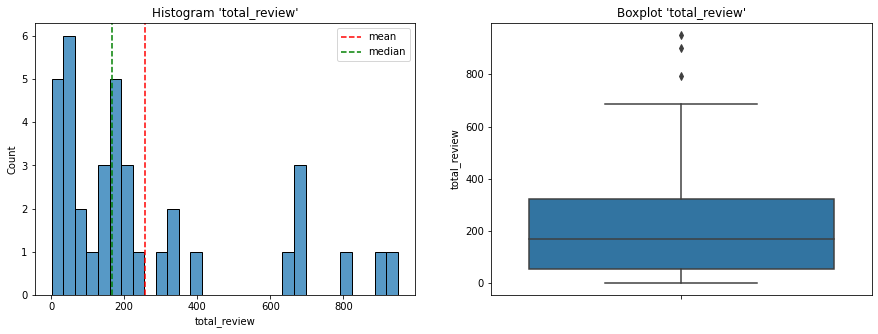

Skewness : 1.3306707324506668
Kolom 'total_review' right skewed (miring ke kanan)


In [9]:
plot_dist(df, "total_review")

In [10]:
X_num = df[["rating"]]
X_num.head()

,rating
0,4.1
1,4.3
2,4.5
3,4.3
4,4.2


In [11]:
X_col = df[["rate_price","bin_review"]]
X_col.head(9)

,rate_price,bin_review
0,$$,bin_4
1,$$,bin_4
2,$$$,bin_3
3,$$$,bin_4
4,$$,bin_1
5,$$,bin_3
6,$$,bin_4
7,$$,bin_4
8,$,bin_2


In [12]:
scaler_normalizer = Normalizer()
scaler_standar = StandardScaler()

X_num_scaled = scaler_normalizer.fit_transform(X_num)
X_num_final = scaler_standar.fit_transform(X_num_scaled)

In [13]:
X_num_scaled

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [14]:
np.round(X_num_final,10)

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [15]:
encoding = OrdinalEncoder()
X_col_encode = encoding.fit_transform(X_col)
X_col_encode[:9]

array([[1., 3.],
       [1., 3.],
       [2., 2.],
       [2., 3.],
       [1., 0.],
       [1., 2.],
       [1., 3.],
       [1., 3.],
       [0., 1.]])

In [16]:
X_final = np.concatenate([X_num_final,X_col_encode], axis=1)
X_final

array([[0., 1., 3.],
       [0., 1., 3.],
       [0., 2., 2.],
       [0., 2., 3.],
       [0., 1., 0.],
       [0., 1., 2.],
       [0., 1., 3.],
       [0., 1., 3.],
       [0., 0., 1.],
       [0., 1., 2.],
       [0., 1., 1.],
       [0., 2., 0.],
       [0., 0., 2.],
       [0., 1., 1.],
       [0., 0., 0.],
       [0., 1., 3.],
       [0., 0., 2.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 3.],
       [0., 1., 2.],
       [0., 1., 3.],
       [0., 2., 1.],
       [0., 2., 0.],
       [0., 0., 0.],
       [0., 1., 1.],
       [0., 1., 2.],
       [0., 1., 3.],
       [0., 1., 2.],
       [0., 2., 0.],
       [0., 2., 1.],
       [0., 0., 0.],
       [0., 1., 1.],
       [0., 1., 1.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 1., 2.]])

---
# Model Definition

Pada tahap ini akan dilakukan inisiasi / definisi awal dari model-model yang akan digunakan.

In [17]:
# model clustering
kmeans = KMeans(n_clusters=3, random_state=100)
agg_clust = AC(linkage='ward')

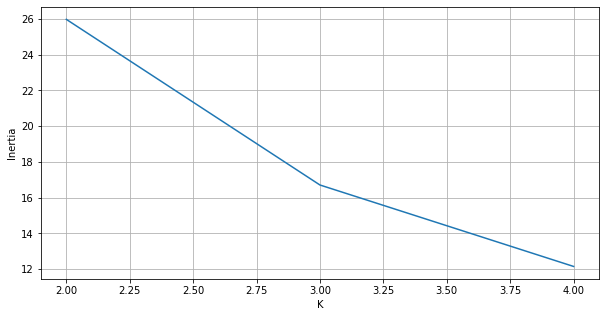

In [18]:
K=[2,3,4]

inertia = [KMeans(n_clusters=i).fit(X_final).inertia_ for i in K]
plt.figure(figsize=(10,5))
plt.plot(K,inertia)
plt.xlabel('K')
plt.ylabel('Inertia')
plt.grid()
plt.show()

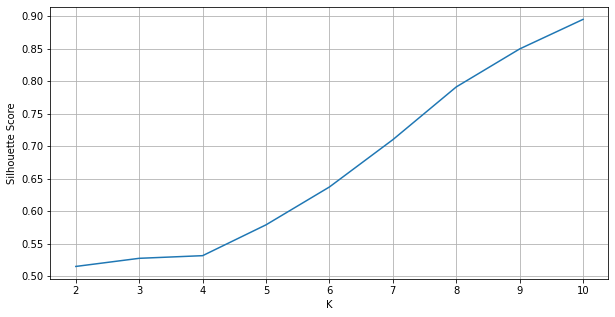

In [19]:
# training model KMeans
K=[2,3,4,5,6,7,8,9,10]
s_score=[silhouette_score(X_final, KMeans(n_clusters=i).fit(X_final).labels_) for i in K]
plt.figure(figsize=(10,5))
plt.plot(K,s_score)
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

In [20]:
scl = SpectralClustering(n_clusters=3,affinity='nearest_neighbors')
scl.fit(X_final)

SpectralClustering(affinity='nearest_neighbors', n_clusters=3)

In [22]:
sc_df = pd.DataFrame(scl.labels_, columns = ['Cluster'])
hasil_scl = pd.concat([df, sc_df], axis=1)
hasil_scl["Cluster"].value_counts()

1    17
2    13
0     7
Name: Cluster, dtype: int64

In [23]:
print('Rata-rata type 0 :\n', hasil_scl[hasil_scl['Cluster'] == 0]['rate_price'].value_counts())
print('Rata-rata type 1 :\n', hasil_scl[hasil_scl['Cluster'] == 1]['rate_price'].value_counts())
print('Rata-rata type 2 :\n', hasil_scl[hasil_scl['Cluster'] == 2]['rate_price'].value_counts())


Rata-rata type 0 :
 $    7
Name: rate_price, dtype: int64
Rata-rata type 1 :
 $$     13
$       3
$$$     1
Name: rate_price, dtype: int64
Rata-rata type 2 :
 $$     7
$$$    6
Name: rate_price, dtype: int64


In [24]:
hasil_scl[hasil_scl['Cluster'] == 2]

,restaurant_name,rating,total_review,rate_price,restaurant_type,coordinate,image,bin_review,Cluster
2,Atlantis On The Rock,4.5,223,$$$,Western Food,"-8.456781069547054, 119.87035200997813",https://lh5.googleusercontent.com/p/AF1QipPJWt...,bin_3,2
4,Hong Signature Restaurant,4.2,45,$$,Seafood,"-8.495971482783027, 119.87899569648584",https://lh5.googleusercontent.com/p/AF1QipPAas...,bin_1,2
10,Baccalá,4.6,149,$$,Western Food,"-8.491754283226278, 119.8778149970323",https://lh5.googleusercontent.com/p/AF1QipOqnW...,bin_2,2
11,RINCA Restaurant,4.3,36,$$$,Indonesian Food,"-8.468150489124445, 119.87401067487203",https://lh5.googleusercontent.com/p/AF1QipNYVb...,bin_1,2
13,BAJO SUNSET HOTEL & FLORES FOOD RESTAURANT,3.9,66,$$,Western Food,"-8.485863682510606, 119.87817983881429",https://lh5.googleusercontent.com/p/AF1QipMN0m...,bin_2,2
17,Restaurant @ Angel Island Resort Komodo,4.8,14,$$,Western Food,"-8.483272679163987, 119.83890982457683",https://lh5.googleusercontent.com/p/AF1QipOE5s...,bin_1,2
22,Say Se'i Restaurant,4.3,166,$$$,Indonesian Food,"-8.487476382554066, 119.8954531676501",https://lh5.googleusercontent.com/p/AF1QipOdyl...,bin_2,2
23,Kisik Grill,4.6,11,$$$,Seafood,"-8.468350117629567, 119.87394876764986",https://lh5.googleusercontent.com/p/AF1QipN1FJ...,bin_1,2
25,Dragon Resto,4.3,129,$$,Chinese Food,"-8.484948305296118, 119.89458538299286",https://lh5.googleusercontent.com/p/AF1QipPoRE...,bin_2,2
29,HONZEN Komodo,3.7,21,$$$,Japanese Food,"-8.467892305778825, 119.87403342532129",https://lh5.googleusercontent.com/p/AF1QipOjhr...,bin_1,2


In [30]:
hasil_scl['cluster_resto'] = hasil_scl['Cluster'].map({0 : 'Basic',  1 : 'Deluxe', 2 : 'King'})
hasil_scl.cluster_resto.value_counts()

Deluxe    17
King      13
Basic      7
Name: cluster_resto, dtype: int64

In [37]:
hasil_scl.to_csv('resto_final.csv', index=False)